* if the data was perfectly linear we would have just drawn a line and find the solution or predict it

* but, the data is not perfectly linear so we need to find the "best fit line" 

* a line that closely passess through all the points to do that

* our goal is to find the value of m and b

* there are two ways to do that 

1) closed-form solution:- (OLS - Ordinary Least Square  ,implemented in sklearn's linear regression class )

a solution that contain / * + - and function but not integration or differentiation

example 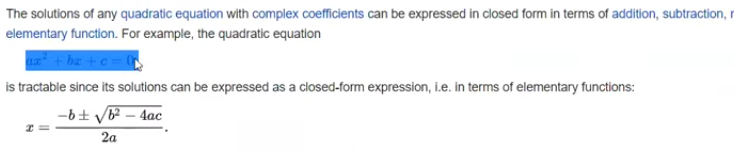

2) non-closed-form  solution:- (Gradient desenct , implemented in SGD Regresser)

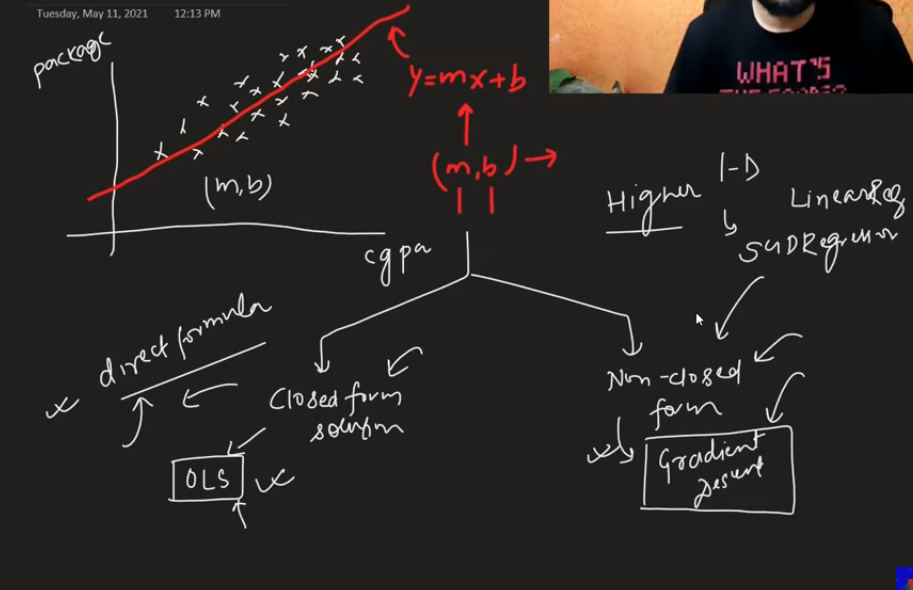



### formula to calculate slope m and b

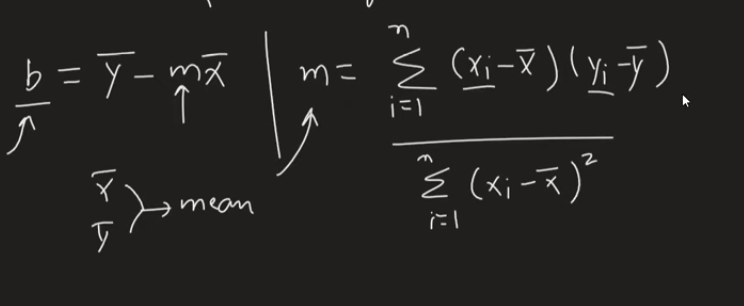

error function E or (J):
the total error we are adding it E = d1 + d2 + d3...

* why we doing squaring ? why not take mode | |
reason 
1) to penalize the outliears
2) mode graph is not differentiable where as square graph is differentiable (parabola)

stupid asks why not take cubic(3) jab 2 se kam ho ra to 3 kyo lu bhai :) 

find the value of m and b so that the value of E is minimize

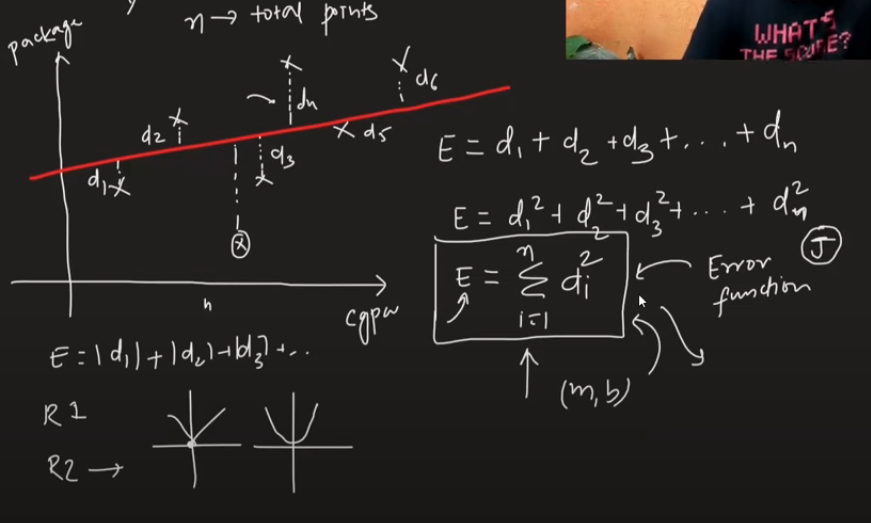

so the points in the line is predicted points called y^ (y hat)
and the actual points are called y

the difference between the actual and the predicted is d

di = (yi - yi^)
put this in equation of E

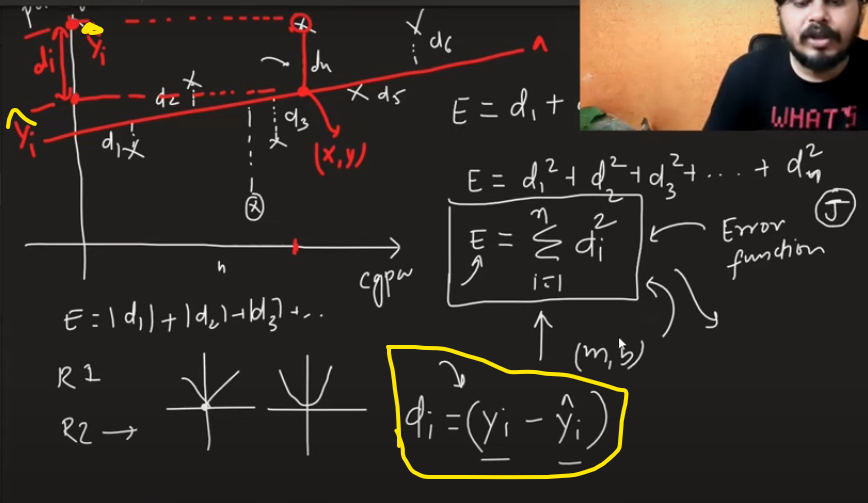

yi^ the predicted y value is depends on the m and b value puting that on the eq of E we get this:-

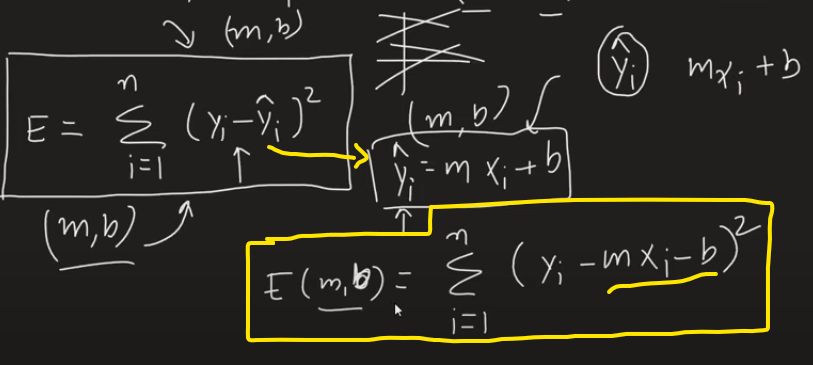

we need to minimize the value of E by (m,b)

* differentiating w.r.t b

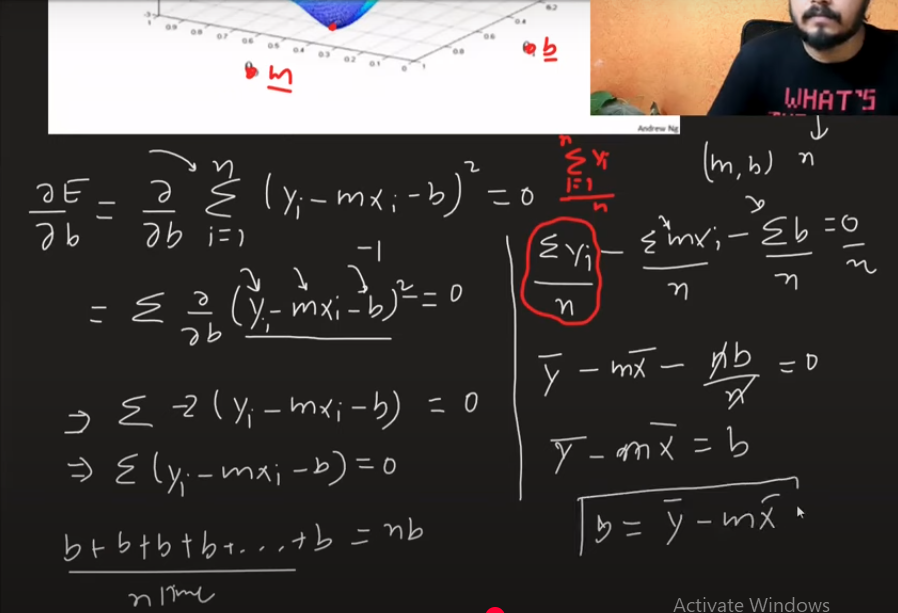

* differentiating w.r.t m

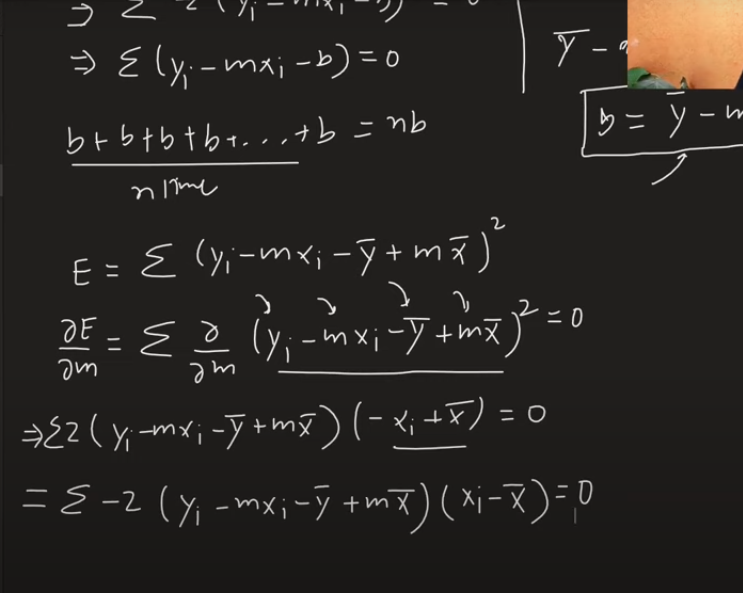

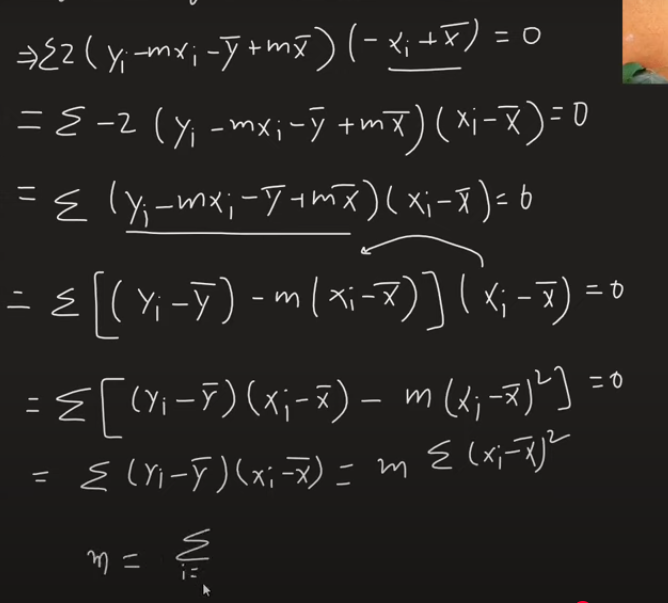

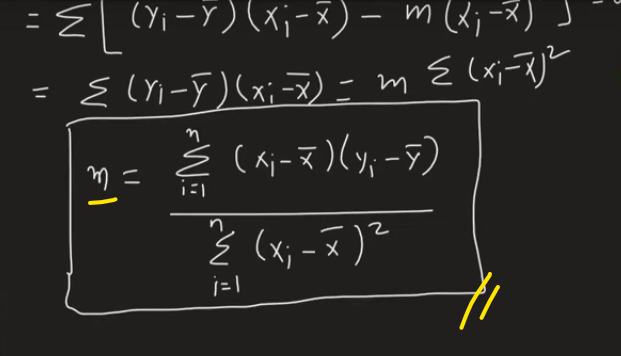

# Creating our own LR just like Scikit-learn

In [18]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, x_train, y_train):
        
        num = 0
        den = 0

        for i in range(x_train.shape[0]):

            num = num + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((x_train[i] - x_train.mean())**2)
        
        self.m = num/den
        self.b = (y_train.mean() - (self.m * x_train.mean()))

        print(self.m)
        print(self.b)

    
    def predict(self, x_test):
        return self.m * x_test + self.b

In [2]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [6]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [7]:
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [8]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [11]:
x_train.shape

(160,)

In [19]:
lr = MeraLR() #creating a object

In [20]:
lr.fit(x_train, y_train) #using the fit method

0.5579519734250721
-0.8961119222429152


### you can check the prev lec the value of m and b is same as previous :)

In [21]:
#lets predict
x_test[0]

8.58

In [23]:
print(lr.predict(x_test[0]))

3.891116009744203


# This is only for Simple Linear regression okiee:)